In [1]:
# Importazione del df e dei moduli necessari

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy as sp

In [2]:
df = pd.read_csv("songs_normalize.csv")

In [3]:
m = (df["year"] >= 2000) & (df["year"] <= 2019)
df = df[m]
df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
6,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.0302,0.000000,0.0454,0.760,104.504,hip hop
7,Robbie Williams,Rock DJ,258560,False,2000,68,0.708,0.772,7,-4.264,1,0.0322,0.0267,0.000000,0.4670,0.861,103.035,"pop, rock"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


In [4]:
df_copy = df.copy()

mode_map_array = ["Minor", "Major"]
key_map_array = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]

# Conversione della colonna "mode"
df_copy["key"] = df_copy["key"].apply(lambda x: key_map_array[x])
df_copy["mode"] = df_copy["mode"].apply(lambda x: mode_map_array[x])

df_copy

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,C#,-5.444,Minor,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,C,-4.063,Minor,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,G#,-4.806,Minor,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
6,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,F,-4.244,Minor,0.0572,0.0302,0.000000,0.0454,0.760,104.504,hip hop
7,Robbie Williams,Rock DJ,258560,False,2000,68,0.708,0.772,G,-4.264,Major,0.0322,0.0267,0.000000,0.4670,0.861,103.035,"pop, rock"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,C#,-5.065,Minor,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,A,-5.707,Major,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,A,-8.635,Major,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,G#,-7.513,Major,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


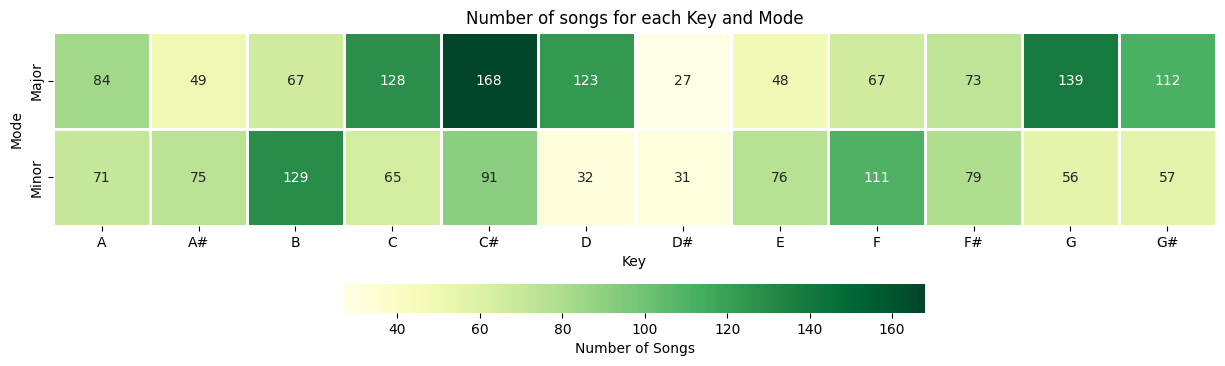

In [8]:
# Crea la JointGrid
plt.figure(figsize=(15,5))
ax = sns.heatmap(data=heatmap_data, square=True, linewidths=1, cmap="YlGn", cbar_kws={'label': 'Number of Songs', "shrink" : .5, "location": "bottom"}, fmt="d" , annot=True)
ax.set(title="Number of songs for each Key and Mode", xlabel="Key", ylabel="Mode");

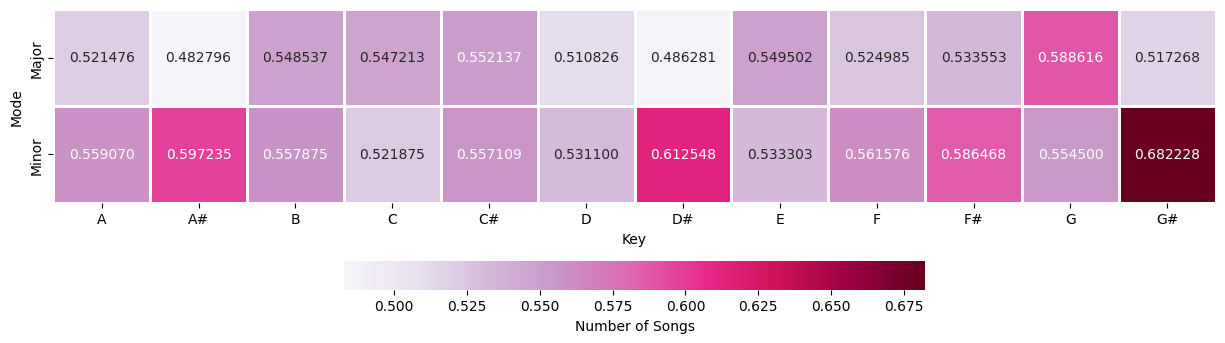

In [11]:
mean_pivot = df_copy.pivot_table(values="valence", index="mode", columns="key", aggfunc="mean")

plt.figure(figsize=(15,5))
sns.heatmap(data=mean_pivot, square=True, linewidths=1, cmap="PuRd", cbar_kws={'label': 'Number of Songs', "shrink" : .5, "location": "bottom"}, fmt="f" , annot=True)

# plt.title("Numero di canzoni per chiave e tonalità")
plt.xlabel("Key")
plt.ylabel("Mode")
plt.show()

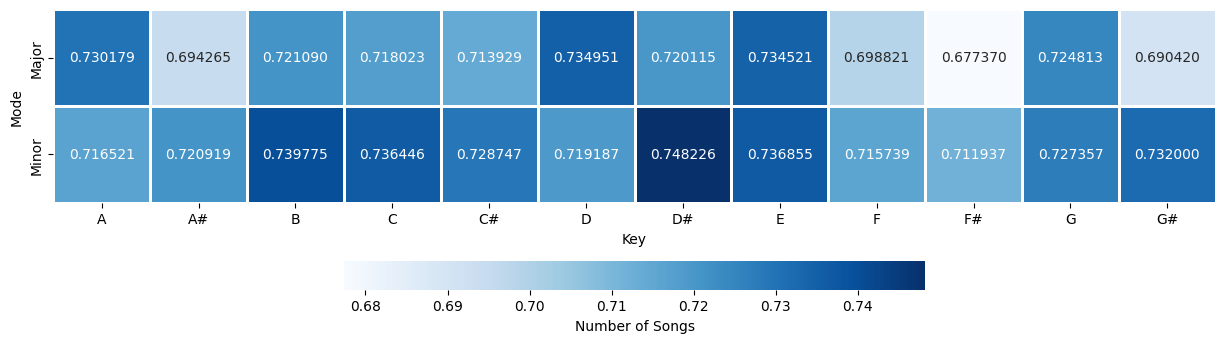

In [13]:
energy_pivot = df_copy.pivot_table(values="energy", index="mode", columns="key", aggfunc="mean")

plt.figure(figsize=(15,5))
sns.heatmap(data=energy_pivot, square=True, linewidths=1, cmap="Blues", cbar_kws={'label': 'Number of Songs', "shrink" : .5, "location": "bottom"}, fmt="f" , annot=True)

# plt.title("Numero di canzoni per chiave e tonalità")
plt.xlabel("Key")
plt.ylabel("Mode")
plt.show()

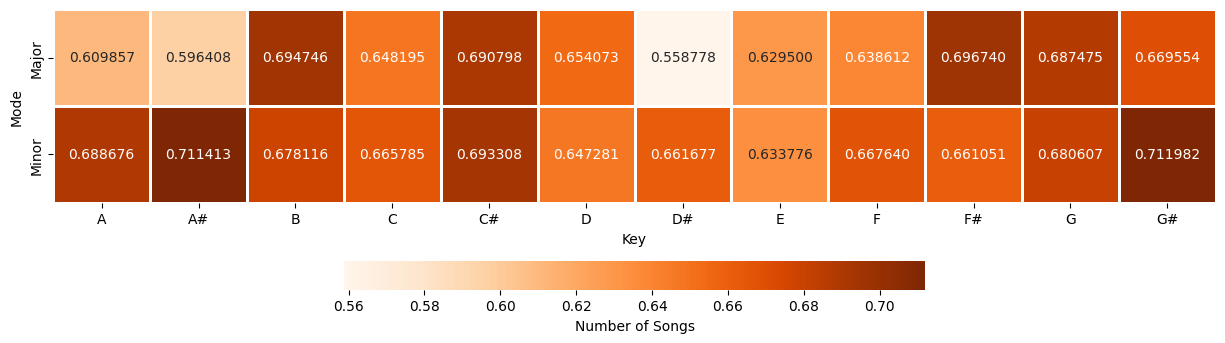

In [17]:
danceability_pivot = df_copy.pivot_table(values="danceability", index="mode", columns="key", aggfunc="mean")

plt.figure(figsize=(15,5))
sns.heatmap(data=danceability_pivot, square=True, linewidths=1, cmap="Oranges", cbar_kws={'label': 'Number of Songs', "shrink" : .5, "location": "bottom"}, fmt="f" , annot=True)

# plt.title("Numero di canzoni per chiave e tonalità")
plt.xlabel("Key")
plt.ylabel("Mode")
plt.show()

In [31]:
final = df_copy.groupby("mode").aggregate({"valence": ["mean", "median", "min", "max"],
                                           "energy": ["mean", "median", "min", "max"],
                                           "danceability": ["mean", "median", "min", "max"]})

display(final)
display(df_copy.groupby(["key", "mode"]).aggregate({"valence" : "mean", "energy" : "mean", "danceability" : "mean"}))

valence                          energy                        \
           mean median     min    max      mean median     min    max   
mode                                                                    
Major  0.537537  0.543  0.0381  0.973  0.714247  0.731  0.0581  0.999   
Minor  0.568375  0.582  0.0756  0.973  0.727278  0.743  0.0549  0.981   

      danceability                       
              mean median    min    max  
mode                                     
Major     0.659885  0.672  0.129  0.975  
Minor     0.676422  0.684  0.177  0.970

valence    energy  danceability
key mode                                   
A   Major  0.521476  0.730179      0.609857
    Minor  0.559070  0.716521      0.688676
A#  Major  0.482796  0.694265      0.596408
    Minor  0.597235  0.720919      0.711413
B   Major  0.548537  0.721090      0.694746
    Minor  0.557875  0.739775      0.678116
C   Major  0.547213  0.718023      0.648195
    Minor  0.521875  0.736446      0.665785
C#  Major  0.552137  0.713929      0.690798
    Minor  0.557109  0.728747      0.693308
D   Major  0.510826  0.734951      0.654073
    Minor  0.531100  0.719187      0.647281
D#  Major  0.486281  0.720115      0.558778
    Minor  0.612548  0.748226      0.661677
E   Major  0.549502  0.734521      0.629500
    Minor  0.533303  0.736855      0.633776
F   Major  0.524985  0.698821      0.638612
    Minor  0.561576  0.715739      0.667640
F#  Major  0.533553  0.677370      0.696740
    Minor  0.586468  0.711937      0.661051
G   Major  0.588616  0.724813      0.687475
    Minor  0.554500  0.727357      0.680607
G#  Major  0.517268  0.690420      0.669554
    Minor  0.682228  0.732000      0.711982